In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
batch_size = 12
num_epochs = 50

In [19]:
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200,200,1)))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 99, 99, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)            

In [9]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(img_height,img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(img_height,img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size)

Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [21]:
hist = cnn.fit(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=8,
    validation_data=validation_generator,
    validation_steps=2)

Epoch 1/50
8/8 [==============================] - 3s 389ms/step - loss: 2.3023 - accuracy: 0.1042 - val_loss: 2.3026 - val_accuracy: 0.0417
Epoch 2/50
8/8 [==============================] - 3s 328ms/step - loss: 2.3032 - accuracy: 0.1522 - val_loss: 2.3043 - val_accuracy: 0.0833
Epoch 3/50
8/8 [==============================] - 3s 335ms/step - loss: 2.3066 - accuracy: 0.0833 - val_loss: 2.3098 - val_accuracy: 0.0833
Epoch 4/50
8/8 [==============================] - 3s 339ms/step - loss: 2.3001 - accuracy: 0.1042 - val_loss: 2.2696 - val_accuracy: 0.2083
Epoch 5/50
8/8 [==============================] - 3s 322ms/step - loss: 2.2935 - accuracy: 0.1042 - val_loss: 2.2469 - val_accuracy: 0.1667
Epoch 6/50
8/8 [==============================] - 3s 331ms/step - loss: 2.2697 - accuracy: 0.1354 - val_loss: 2.1979 - val_accuracy: 0.3750
Epoch 7/50
8/8 [==============================] - 3s 339ms/step - loss: 2.1643 - accuracy: 0.3021 - val_loss: 2.2099 - val_accuracy: 0.2500
Epoch 8/50
8/8 [====

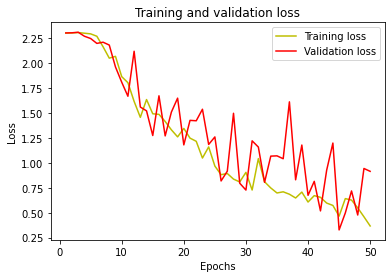

In [24]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()